In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import spotipy 
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 

In [3]:
cli = 'string' #client id found from your spotify API account. I chose to leave mine out for security purposes 
csec = 'string' #client Secret from  your spotify API account. I chose to leave mine out for security purposes
client_credentials_manager = SpotifyClientCredentials(client_id=cli, client_secret=csec) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

def get_songs(ply_name, ply_id): #takes playlist name, playlist id, creates dataframe of playlist
    playlist = sp.user_playlist(ply_name, ply_id)
    songs = playlist['tracks']['items']
    next_song = playlist['tracks']['next']
    for jj in range(int(playlist['tracks']['total'] / playlist['tracks']['limit'])): #overrides 100 song extraction limit
        response = sp._get(next_song)
        songs += response['items']
        next_song = response['next']
    song_list_df = pd.DataFrame([(track['track']['name'], track['track']['artists'][0]['name'],
                                  track['track']['album']['release_date'], track['track']['id'])
                          for track in songs], columns = ['Song Name', 'Artist', 'Release Date', 'id'])
    return song_list_df

metal_ply = 'Metal' #metal playlist
metal_id = '65ka0JejRZoItJe2lWmpJF?si=sy8K1YfNSd6Ez7xvXOQgVw' # metal playlist id
metal_df = get_songs(metal_ply, metal_id)
metal_df

,Song Name,Artist,Release Date,id
0,The End of All We Know,Bleed From Within,2019-11-29,14EXZEog1hW97d6yz8ejih
1,5x3,Upon A Burning Body,2020-05-22,51xLAqptt4zeNgZDfsiAo9
2,Breaking the Mirror,Fit For A King,2020-03-13,3Ho0uOyCz245GWUqlWrkf5
3,Memento Mori,Lamb of God,2020-03-17,6V1tb8rFw1nPeOXX4sccTC
4,Death Diviner,Soilwork,2020-05-29,4zx54sa1AiERlvrFyLMXtJ
5,Let The Chaos Reign,Pop Evil,2020-04-29,01zEyqBizEZ1MDOaJ4nL4d
6,Stop the Bleeding (Feat. Jesse Leach),Machine Head,2020-06-17,0yK3bCcDM5cDDykBlQ5S2w
7,Catastrophist,Trivium,2020-04-24,3fnqNxjN7o0tJe7zOQZV68
8,Choke,Bury Tomorrow,2020-02-14,1BW2QdLe6RtJTMJDSYmg9w
9,Afflicted,Hollow Front,2020-06-19,70AJAYFBkXnrd9mA6qz0wU


In [4]:
pop_ply = 'Pop' #pop playlist
pop_id = '0viQ7kYNxxlVJ3NwPTrSgC?si=bYebXRvfTaCx7dqGsmUh8A' #pop playlist id
pop_df = get_songs(pop_ply, pop_id)
pop_df

,Song Name,Artist,Release Date,id
0,Nobody's Love,Maroon 5,2020-07-24,3kwgqoBqTwoAH4nT29TYrq
1,Take You Dancing,Jason Derulo,2020-07-22,59qrUpoplZxbIZxk6X0Bm3
2,supercuts,Jeremy Zucker,2020-07-24,4PyMK7JTcu6l30D8KogokR
3,exile (feat. Bon Iver),Taylor Swift,2020-07-24,4pvb0WLRcMtbPGmtejJJ6y
4,Be Like That - feat. Swae Lee & Khalid,Kane Brown,2020-07-10,5f1joOtoMeyppIcJGZQvqJ
5,UN DIA (ONE DAY) (Feat. Tainy),J Balvin,2020-07-24,0EhpEsp4L0oRGM0vmeaN5e
6,Funny,Zedd,2020-07-16,4FYbo4yQzu3hGkj2Ix4ucW
7,cardigan,Taylor Swift,2020-07-24,4R2kfaDFhslZEMJqAFNpdd
8,So What!,jxdn,2020-07-16,0t66WOHS2gTyP9UnjFTqra
9,queen of broken hearts,blackbear,2020-07-10,1YaLBadQjS701ZLZRGjPMX


In [5]:
def get_aud_feats(ply_df): #takes dataframe, gets audio features for each song
    aud_feats = []
    for jj, ii in ply_df.groupby(np.arange(len(ply_df))).id:
        aud_feats += sp.audio_features([*map(str, ii)]) #map functions takes a specified function (str) and applies it to data (ii)
    aud_feats_df = pd.DataFrame.from_dict(aud_feats)
    aud_feats_df = aud_feats_df.drop(columns = ['analysis_url','track_href','type', 'uri']) #drop unnecessary columns
    full_song_quals_df = pd.merge(ply_df, aud_feats_df, on = 'id') #merge original dataframe with audio feautes dataframe
    full_song_quals_df = full_song_quals_df.sort_values('Song Name')
    return full_song_quals_df
all_metal_feats_df = get_aud_feats(metal_df) #resulting dataframes
all_pop_feats_df = get_aud_feats(pop_df)

In [6]:
all_metal_feats_df.head()

,Song Name,Artist,Release Date,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
132,(Anesthesia)--Pulling Teeth (Remastered),Metallica,1983-07-25,543qcqtmy9eCke65RWRVaQ,0.000626,0.224,254560,0.886,0.834000,7,0.6300,-7.619,1,0.0772,99.286,4,0.132
104,...And Justice for All (Remastered),Metallica,1988-09-07,0ep7UTGw3F9VkN9FV52En3,0.000071,0.382,585507,0.793,0.147000,4,0.0541,-7.342,0,0.1830,173.583,4,0.424
255,1000hp,Godsmack,2014-01-01,3NW1h8l6EY5N6HNBL83S4V,0.000044,0.520,226540,0.948,0.000014,6,0.0525,-3.951,0,0.0515,92.091,4,0.471
286,2 Minutes to Midnight - 1998 Remaster,Iron Maiden,1984,6aYXSH9JZrD30Av2KlAOMY,0.000275,0.459,359760,0.953,0.000305,4,0.1410,-6.518,0,0.0660,95.074,4,0.517
334,2nd Sucks,A Day To Remember,2011-10-01,6UZ8PjuMPQI6i7NOImb2mA,0.000133,0.501,147627,0.989,0.000002,7,0.5700,-4.369,1,0.1730,140.029,4,0.162


In [7]:
all_pop_feats_df.head()

,Song Name,Artist,Release Date,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
99,1-800-273-8255,Logic,2017-05-05,5tz69p7tJuGPeMGwNTxYuV,0.569,0.620,250173,0.574,0.000000,5,0.1900,-7.788,0,0.0479,100.023,4,0.357
250,"10,000 Hours (with Justin Bieber)",Dan + Shay,2019-10-04,2wrJq5XKLnmhRXHIAf9xBa,0.153,0.654,167693,0.630,0.000000,10,0.1110,-4.644,1,0.0259,89.991,4,0.430
355,100 Years,Five For Fighting,2004-02-03,0B5KeB25moPkcQUnbDvj3t,0.544,0.643,244600,0.569,0.000022,7,0.1780,-7.459,1,0.0276,120.507,4,0.275
428,1234,Feist,2007-01-01,2CzWeyC9zlDpIOZPUUKrBW,0.217,0.710,183667,0.484,0.000004,2,0.0879,-7.415,1,0.0490,109.951,4,0.576
49,17,Pink Sweat$,2020-02-28,034KyQEk7IhbLtniVhBErj,0.169,0.558,160737,0.364,0.000099,5,0.1090,-8.663,1,0.0502,129.170,4,0.252


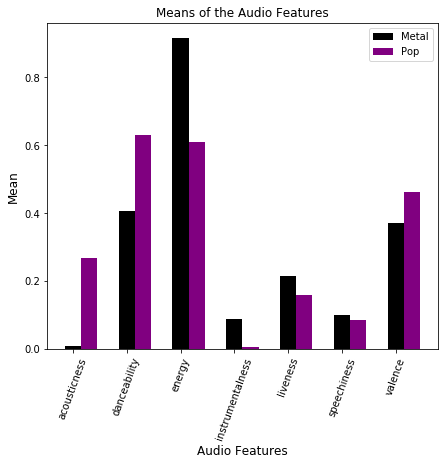

In [8]:
def calc_mean(df, str): #function to calculate means
    col_name = df[str].to_list()
    mean = np.mean(col_name)
    return mean

acoustic_metal = calc_mean(all_metal_feats_df, 'acousticness')
acoustic_pop = calc_mean(all_pop_feats_df, 'acousticness')

dance_metal = calc_mean(all_metal_feats_df, 'danceability')
dance_pop = calc_mean(all_pop_feats_df, 'danceability')

energy_metal = calc_mean(all_metal_feats_df, 'energy')
energy_pop = calc_mean(all_pop_feats_df, 'energy')

instrument_metal = calc_mean(all_metal_feats_df, 'instrumentalness')
instrument_pop = calc_mean(all_pop_feats_df, 'instrumentalness')

live_metal = calc_mean(all_metal_feats_df, 'liveness')
live_pop = calc_mean(all_pop_feats_df, 'liveness')

speech_metal = calc_mean(all_metal_feats_df, 'speechiness')
speech_pop = calc_mean(all_pop_feats_df, 'speechiness')

valence_metal = calc_mean(all_metal_feats_df, 'valence')
valence_pop = calc_mean(all_pop_feats_df, 'valence')

y1 = [acoustic_metal, dance_metal, energy_metal, instrument_metal, live_metal, speech_metal, valence_metal]
y2 = [acoustic_pop, dance_pop, energy_pop, instrument_pop, live_pop, speech_pop, valence_pop]
x_axis = np.arange(7)
width = .3
plt.figure(figsize=(7,6))
plt.bar(x_axis, y1, width, color = 'black', label = 'Metal')
plt.bar(x_axis+width, y2, width, color = 'purple', label = 'Pop')
plt.xticks(x_axis,('acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence'), 
           rotation = 70)
plt.xlabel('Audio Features', fontsize = 12)
plt.ylabel('Mean', fontsize = 12)
plt.title('Means of the Audio Features')
plt.legend()

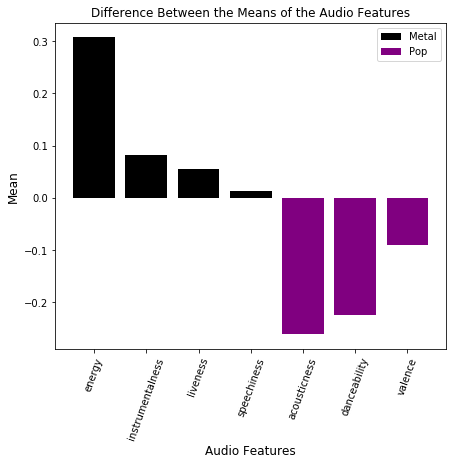

In [9]:
acoustic_dif = acoustic_metal - acoustic_pop #find the difference between each mean
dance_dif = dance_metal - dance_pop
energy_dif = energy_metal - energy_pop
instrument_dif = instrument_metal - instrument_pop
live_dif = live_metal - live_pop
speech_dif = speech_metal - speech_pop
valence_dif = valence_metal - valence_pop

x_axis_metal = np.arange(4)
x_axis_pop = np.arange(3)
y_dif_metal = [energy_dif, instrument_dif, live_dif, speech_dif]
y_dif_pop = [acoustic_dif, dance_dif, valence_dif]
plt.figure(figsize=(7,6))
plt.bar(x_axis_metal, y_dif_metal, color = 'black', label = 'Metal')
plt.bar(x_axis_pop+4, y_dif_pop, color = 'purple',label = 'Pop')
plt.xticks(x_axis,('energy', 'instrumentalness', 'liveness', 'speechiness', 'acousticness', 'danceability', 'valence'), 
           rotation = 70)
plt.xlabel('Audio Features', fontsize = 12)
plt.ylabel('Mean', fontsize = 12)
plt.title('Difference Between the Means of the Audio Features')
plt.legend()    

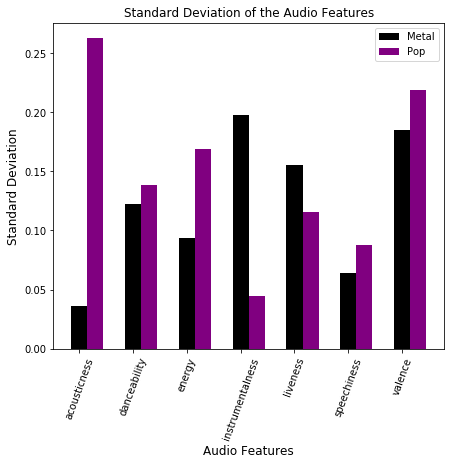

In [10]:
def calc_std(df, str): #function to find the standard deviation 
    col_name = df[str].to_list()
    stan_dev = np.std(col_name)
    return stan_dev

ac_met_std = calc_std(all_metal_feats_df, 'acousticness')
ac_pop_std = calc_std(all_pop_feats_df, 'acousticness')

dance_met_std = calc_std(all_metal_feats_df, 'danceability')
dance_pop_std = calc_std(all_pop_feats_df, 'danceability')

energy_met_std = calc_std(all_metal_feats_df, 'energy')
energy_pop_std = calc_std(all_pop_feats_df, 'energy')

inst_met_std = calc_std(all_metal_feats_df, 'instrumentalness')
inst_pop_std = calc_std(all_pop_feats_df, 'instrumentalness')

live_met_std = calc_std(all_metal_feats_df, 'liveness')
live_pop_std = calc_std(all_pop_feats_df, 'liveness')

speech_met_std = calc_std(all_metal_feats_df, 'speechiness')
speech_pop_std = calc_std(all_pop_feats_df, 'speechiness')

valence_met_std = calc_std(all_metal_feats_df, 'valence')
valence_pop_std = calc_std(all_pop_feats_df, 'valence')

y_met_std = [ac_met_std, dance_met_std, energy_met_std, inst_met_std, live_met_std, speech_met_std, valence_met_std]
y_pop_std = [ac_pop_std, dance_pop_std, energy_pop_std, inst_pop_std, live_pop_std, speech_pop_std, valence_pop_std]
plt.figure(figsize=(7,6))
plt.bar(x_axis, y_met_std, width, color = 'black', label = 'Metal')
plt.bar(x_axis+width, y_pop_std, width, color = 'purple',label = 'Pop')
plt.xticks(x_axis,('acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence'), 
           rotation = 70)
plt.xlabel('Audio Features', fontsize = 12)
plt.ylabel('Standard Deviation', fontsize = 12)
plt.title('Standard Deviation of the Audio Features')
plt.legend()

Text(0.5, 1.0, 'Mean of the Standard Deviations of the Audio Features')

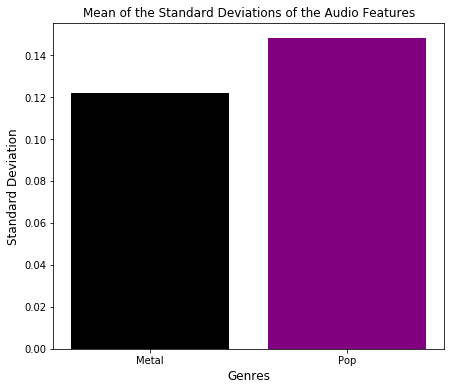

In [11]:
total_met_std = np.mean(y_met_std) #mean of standard deviations
total_pop_std = np.mean(y_pop_std)

plt.figure(figsize=(7,6))
plt.bar('Metal', total_met_std, color = 'black')
plt.bar('Pop', total_pop_std, color = 'purple')
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Standard Deviation', fontsize = 12)
plt.title('Mean of the Standard Deviations of the Audio Features')

Text(0.5, 1.0, 'Standard Deviations of the Time Signatures')

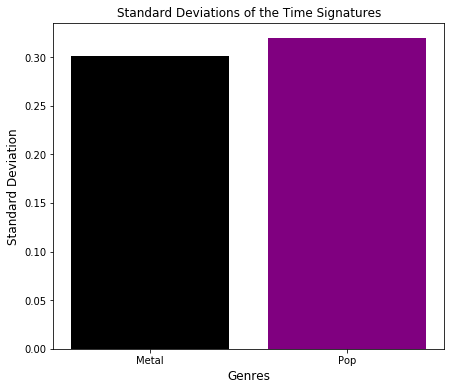

In [12]:
metal_sigs = calc_std(all_metal_feats_df, 'time_signature') #mean of time signatures
pop_sigs = calc_std(all_pop_feats_df, 'time_signature')

plt.figure(figsize=(7,6))
plt.bar('Metal', metal_sigs, color = 'black')
plt.bar('Pop', pop_sigs, color = 'purple')
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Standard Deviation', fontsize = 12)
plt.title('Standard Deviations of the Time Signatures')

Text(0.5, 1.0, 'Mean of Durations (ms)')

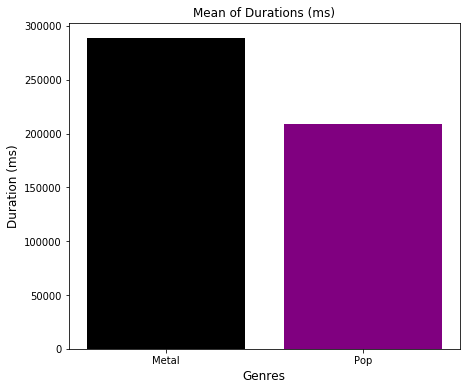

In [13]:
metal_duration = calc_mean(all_metal_feats_df, 'duration_ms') #mean of song durations
pop_duration = calc_mean(all_pop_feats_df, 'duration_ms')

plt.figure(figsize=(7,6))
plt.bar('Metal', metal_duration, color = 'black')
plt.bar('Pop', pop_duration, color = 'purple')
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Duration (ms)', fontsize = 12)
plt.title('Mean of Durations (ms)')

Text(0.5, 1.0, 'Mean of Tempos')

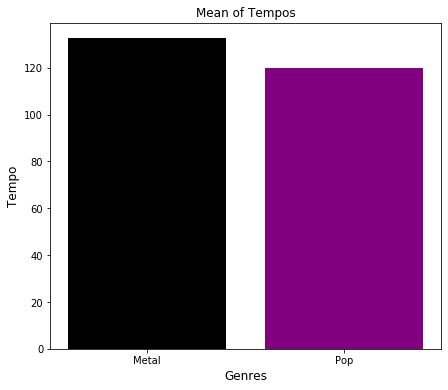

In [14]:
metal_tempo = calc_mean(all_metal_feats_df, 'tempo') #mean of tempos
pop_tempo = calc_mean(all_pop_feats_df, 'tempo')

plt.figure(figsize=(7,6))
plt.bar('Metal', metal_tempo, color = 'black')
plt.bar('Pop', pop_tempo, color = 'purple')
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Tempo', fontsize = 12)
plt.title('Mean of Tempos')

Text(0.5, 1.0, 'Mean of Loudness (db)')

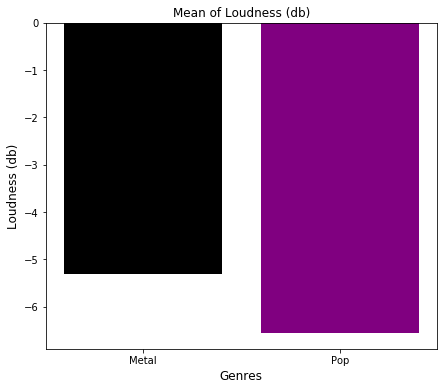

In [15]:
metal_loudness = calc_mean(all_metal_feats_df, 'loudness') #mean of loudnesses
pop_loudness = calc_mean(all_pop_feats_df, 'loudness')

plt.figure(figsize=(7,6))
plt.bar('Metal', metal_loudness, color = 'black')
plt.bar('Pop', pop_loudness, color = 'purple')
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Loudness (db)', fontsize = 12)
plt.title('Mean of Loudness (db)')

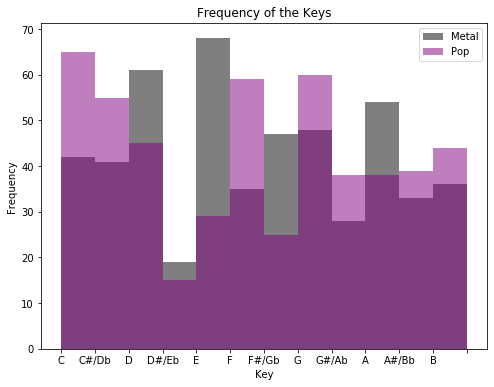

In [16]:
metal_keys = all_metal_feats_df['key'].to_list() #finding the frequency of each key in each genre
pop_keys = all_pop_feats_df['key'].to_list()
bins = np.linspace(0,11,13)
plt.figure(figsize = (8,6))
plt.hist(metal_keys, bins, alpha = .5, color = 'black', label = 'Metal')
plt.hist(pop_keys, bins, alpha = .5, color = 'purple', label = 'Pop')
plt.xticks(bins,('C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B'))
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Frequency of the Keys')
plt.legend()

([<matplotlib.patches.Wedge at 0x246c76ad358>,
 [Text(-1.0965023292202825, -0.08765068176857295, 'Major'),
  Text(1.0965023292202822, 0.0876506817685733, 'Minor')],
 [Text(-0.5980921795746994, -0.04780946278285796, '52.5%'),
  Text(0.5980921795746994, 0.04780946278285816, '47.5%')])

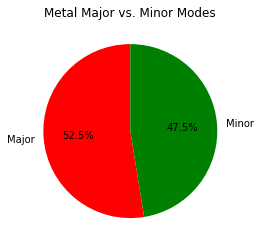

In [17]:
metal_modes = all_metal_feats_df['mode'].to_list()
pop_modes = all_pop_feats_df['mode'].to_list()

def mode_counter(mode_list, genre): #creates a pie chart of the modes in each genre
    major = 0
    minor = 0
    for jj in mode_list:
        if jj == 1:
            major+=1
        else:
            minor+=1
    labels = ['Major', 'Minor']
    values = [major, minor]
    colors = ['red', 'green']
    fig = plt.pie(values, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 90)
    plt.title(genre+" Major vs. Minor Modes")
    return fig

genre = 'Metal'
mode_counter(metal_modes, genre)

([<matplotlib.patches.Wedge at 0x246c76d1d30>,
 [Text(-0.8588109514293041, -0.6873454369566249, 'Major'),
  Text(0.8588109514293043, 0.6873454369566248, 'Minor')],
 [Text(-0.4684423371432567, -0.37491569288543175, '71.5%'),
  Text(0.4684423371432568, 0.37491569288543164, '28.5%')])

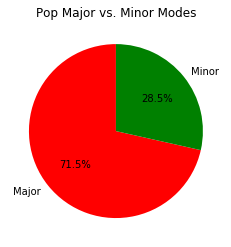

In [18]:
genre = 'Pop'
mode_counter(pop_modes, genre)

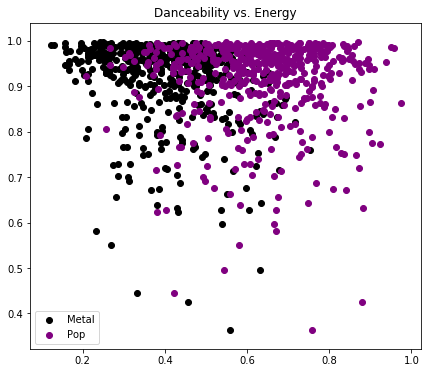

In [19]:
x1 = all_metal_feats_df['danceability'].to_list() #creating various scatter plots to find trends
x2 = all_pop_feats_df['danceability'].to_list()
y1 = all_metal_feats_df['energy'].to_list()
y2 = all_metal_feats_df['energy'].to_list()

plt.figure(figsize=(7,6))
plt.scatter(x1, y1, color = 'black', label = 'Metal')
plt.scatter(x2, y2, color = 'purple',label = 'Pop')
plt.title('Danceability vs. Energy')
plt.legend()

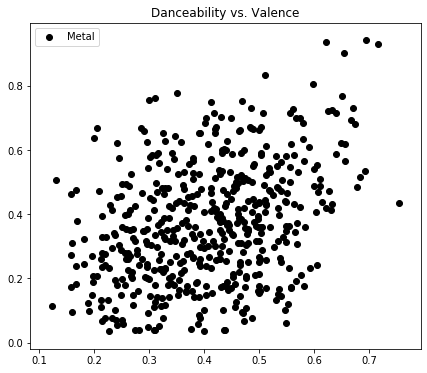

In [20]:
x1 = all_metal_feats_df['danceability'].to_list() #only noticeable correlation was in the metal genre
y1 = all_metal_feats_df['valence'].to_list()

plt.figure(figsize=(7,6))
plt.scatter(x1, y1, color = 'black', label = 'Metal')
plt.title('Danceability vs. Valence')
plt.legend()

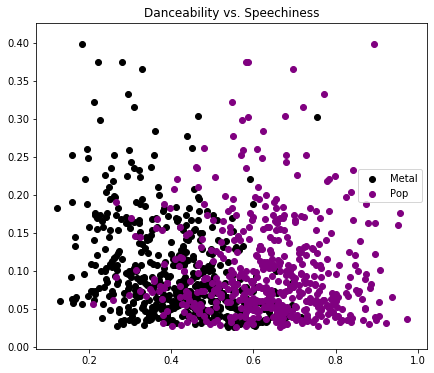

In [21]:
x1 = all_metal_feats_df['danceability'].to_list()
x2 = all_pop_feats_df['danceability'].to_list()
y1 = all_metal_feats_df['speechiness'].to_list()
y2 = all_metal_feats_df['speechiness'].to_list()

plt.figure(figsize=(7,6))
plt.scatter(x1, y1, color = 'black', label = 'Metal')
plt.scatter(x2, y2, color = 'purple', label = 'Pop')
plt.title('Danceability vs. Speechiness')
plt.legend()

In [22]:
#Knearest vs SVM
metal_class = [0]*512 #creating a classifier for genres. Metal = 0, Pop = 1
pop_class = [1]*512
all_metal_feats_df['Genre'] = metal_class #add the classifier column to each dataframe
all_pop_feats_df['Genre'] = pop_class
frames = [all_metal_feats_df, all_pop_feats_df]
all_songs_df = pd.concat(frames) #combine both dataframes into one 
all_songs_df = all_songs_df.sort_values('Song Name')
all_songs_df

,Song Name,Artist,Release Date,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Genre
132,(Anesthesia)--Pulling Teeth (Remastered),Metallica,1983-07-25,543qcqtmy9eCke65RWRVaQ,0.000626,0.224,254560,0.886,0.834000,7,0.6300,-7.619,1,0.0772,99.286,4,0.1320,0
104,...And Justice for All (Remastered),Metallica,1988-09-07,0ep7UTGw3F9VkN9FV52En3,0.000071,0.382,585507,0.793,0.147000,4,0.0541,-7.342,0,0.1830,173.583,4,0.4240,0
99,1-800-273-8255,Logic,2017-05-05,5tz69p7tJuGPeMGwNTxYuV,0.569000,0.620,250173,0.574,0.000000,5,0.1900,-7.788,0,0.0479,100.023,4,0.3570,1
250,"10,000 Hours (with Justin Bieber)",Dan + Shay,2019-10-04,2wrJq5XKLnmhRXHIAf9xBa,0.153000,0.654,167693,0.630,0.000000,10,0.1110,-4.644,1,0.0259,89.991,4,0.4300,1
355,100 Years,Five For Fighting,2004-02-03,0B5KeB25moPkcQUnbDvj3t,0.544000,0.643,244600,0.569,0.000022,7,0.1780,-7.459,1,0.0276,120.507,4,0.2750,1
255,1000hp,Godsmack,2014-01-01,3NW1h8l6EY5N6HNBL83S4V,0.000044,0.520,226540,0.948,0.000014,6,0.0525,-3.951,0,0.0515,92.091,4,0.4710,0
428,1234,Feist,2007-01-01,2CzWeyC9zlDpIOZPUUKrBW,0.217000,0.710,183667,0.484,0.000004,2,0.0879,-7.415,1,0.0490,109.951,4,0.5760,1
49,17,Pink Sweat$,2020-02-28,034KyQEk7IhbLtniVhBErj,0.169000,0.558,160737,0.364,0.000099,5,0.1090,-8.663,1,0.0502,129.170,4,0.2520,1
54,17again,Powfu,2020-07-17,4dO4oVzvRrRRsJgaT4ORlM,0.760000,0.409,168000,0.504,0.000000,7,0.3440,-5.620,1,0.0448,169.244,4,0.4990,1
286,2 Minutes to Midnight - 1998 Remaster,Iron Maiden,1984,6aYXSH9JZrD30Av2KlAOMY,0.000275,0.459,359760,0.953,0.000305,4,0.1410,-6.518,0,0.0660,95.074,4,0.5170,0


In [23]:
#set up data for testing/training
all_songs_df.drop(['Artist', 'Release Date', 'id', 'Song Name'], 1, inplace=True) #drop columns that are not numerical
X = np.array(all_songs_df.drop(['Genre'], 1))
Y = np.array(all_songs_df['Genre']) 


def svm_tests(): #find the average score of SVM kernels
    kernels = ['rbf', 'linear', 'sigmoid']
    for jj in kernels:
        scores = []
        for ii in np.arange(5):
            X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2) #train and test for each new iteration
            clf = SVC(gamma = 'auto', kernel = jj)
            clf.fit(X_train, Y_train)
            sv = clf.score(X_test, Y_test)
            scores.append(sv)    
        average = np.mean(scores)
        accuracy = f"Kernel {jj} average is {sv}"   
        print(accuracy)
        
def logistic_tests(): #find the average score of Logistic solvers
    solvers = ['lbfgs', 'liblinear']
    for jj in solvers:
        scores = []
        for ii in np.arange(5):
            X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2) #train and test for each new iteration
            clf = LogisticRegression(solver = jj)
            clf.fit(X_train, Y_train)
            sv = clf.score(X_test, Y_test)
            scores.append(sv)    
        average = np.mean(scores)
        accuracy = f"Solver {jj} average is {sv}"   
        print(accuracy)        

svm_tests()      
logistic_tests()

Kernel rbf average is 0.47804878048780486
Kernel linear average is 0.7414634146341463
Kernel sigmoid average is 0.4634146341463415
Solver lbfgs average is 0.6048780487804878
Solver liblinear average is 0.5902439024390244


In [24]:
#create two algorithms for the two best approaches
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2) 
clf_svm = SVC(gamma = 'auto', kernel = 'linear') #SVM 
clf_svm.fit(X_train, Y_train)
svm_accuracy = clf_svm.score(X_test, Y_test)

clf_log = LogisticRegression(solver = 'lbfgs') #Logisitic Regression
clf_log.fit(X_train, Y_train)
log_accuracy = clf_log.score(X_test, Y_test)

print('SVM: ', svm_accuracy)
print('Logistic Regression:', log_accuracy)

SVM:  0.7414634146341463
Logistic Regression: 0.5707317073170731


In [25]:
test_ply = 'Testing' #created a playlist of 4 songs to test. 2 metal and 2 pop
test_ply_id = '7oGtL17ww3KfQlmm60xk21?si=YJm6uFXPRiaRAy1mZ8ee7A' #playlist id
test_df = get_songs(test_ply, test_ply_id) #Create the data set
test_df = get_aud_feats(test_df)
test_df

,Song Name,Artist,Release Date,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
3,24K Magic,Bruno Mars,2016-11-17,6b8Be6ljOzmkOmFslEb23P,0.034000,0.818,225983,0.803,0.00000,1,0.1530,-4.282,1,0.0797,106.970,4,0.632
2,Part Of Me,Katy Perry,2012-03-12,1nZzRJbFvCEct3uzu04ZoL,0.000417,0.678,216160,0.918,0.00000,5,0.0744,-4.630,1,0.0355,130.028,4,0.769
1,Six,All That Remains,2006-07-11,3WRTADbL0criwvX6IQFex2,0.000103,0.241,202440,0.961,0.00657,2,0.0994,-3.476,0,0.0852,97.015,4,0.195
0,Welcome To The Jungle,Guns N' Roses,1987-07-21,0G21yYKMZoHa30cYVi1iA8,0.019500,0.453,273480,0.987,0.28300,8,0.2680,-4.485,1,0.0889,123.544,4,0.316


In [26]:
test_df.drop(['Artist', 'Release Date', 'id', 'Song Name'], 1, inplace=True) #drop columns that are not numerical
example = np.array(test_df)
for jj in example:
    jj = jj.reshape(1,-1)
    prediction = clf_svm.predict(jj)
    print("Song prediction:", prediction)

Song prediction: [1]
Song prediction: [1]
Song prediction: [1]
Song prediction: [0]


In [27]:
for jj in example:
    jj = jj.reshape(1,-1)
    prediction = clf_log.predict(jj)
    print("Song prediction:", prediction)

Song prediction: [0]
Song prediction: [1]
Song prediction: [0]
Song prediction: [0]


In [28]:
final_test = 'Test 2' #creating another test data set, this time with 20 songs. 10 metal, 10 pop
final_test_id = '0YqClW7TQp8LA3Wb3cyuKC?si=x1Z7Xj_PR825hY4-TjUeLA' #playlist id
final_test_df = get_songs(final_test, final_test_id) #Create a larger test data set
final_test_df = get_aud_feats(final_test_df)
final_test_df

,Song Name,Artist,Release Date,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
8,Bad Romance,Lady Gaga,2009-11-05,0SiywuOBRcynK0uKGWdCnn,0.003140,0.696,294573,0.921,0.000052,0,0.0842,-3.755,1,0.0363,119.001,4,0.714
1,Coming Undone,Korn,2005-12-06,6p2liQLGoDaLXgND68bfVt,0.000658,0.687,199773,0.677,0.000146,2,0.0564,-4.172,1,0.0508,75.052,4,0.546
5,Crazy In Love,Beyoncé,2003-06-24,5IVuqXILoxVWvWEPm82Jxr,0.002490,0.646,236133,0.770,0.000000,2,0.0715,-6.596,0,0.2260,99.165,4,0.681
0,I Stand Alone,Godsmack,2003-04-08,44NRdYQw7P0GWuiunRv3hr,0.000029,0.217,246040,0.920,0.000000,8,0.1020,-4.479,1,0.0628,167.169,4,0.376
9,Juice,Lizzo,2019-04-19,0k664IuFwVP557Gnx7RhIl,0.006110,0.767,195145,0.889,0.000000,7,0.4020,-2.988,1,0.0963,119.930,4,0.843
7,Location,Khalid,2017-04-27,152lZdxL1OR0ZMW6KquMif,0.330000,0.736,219080,0.449,0.000162,1,0.0898,-11.462,0,0.4250,80.126,4,0.326
4,Metal Health (Bang Your Head),Quiet Riot,1983,28clONjZmul6FjfO6tZQDE,0.043400,0.494,316867,0.933,0.001080,2,0.2280,-5.977,1,0.0808,121.201,4,0.507
6,Roar,Katy Perry,2013-01-01,27tNWlhdAryQY04Gb2ZhUI,0.004920,0.671,223546,0.771,0.000007,7,0.3540,-4.821,0,0.0316,90.003,4,0.436
2,The Devil in I,Slipknot,2014-10-15,5hheGdf1cb4rK0FNiedCfK,0.005910,0.398,342821,0.939,0.000881,9,0.3570,-2.865,0,0.0648,92.027,4,0.235
3,The End of Heartache,Killswitch Engage,2004-05-03,2nUy0ifVE7UwtOK4rugFsP,0.000287,0.469,298107,0.976,0.217000,0,0.0636,-3.569,0,0.1110,124.001,4,0.222


In [29]:
final_test_df.drop(['Artist', 'Release Date', 'id', 'Song Name'], 1, inplace=True) #drop columns that are not numerical
ex_2 = np.array(final_test_df)
for jj in ex_2:
    jj = jj.reshape(1,-1)
    prediction = clf_svm.predict(jj)
    print("Song prediction:", prediction)

Song prediction: [0]
Song prediction: [1]
Song prediction: [1]
Song prediction: [0]
Song prediction: [1]
Song prediction: [1]
Song prediction: [0]
Song prediction: [1]
Song prediction: [0]
Song prediction: [0]


In [30]:
for jj in ex_2:
    jj = jj.reshape(1,-1)
    prediction = clf_log.predict(jj)
    print("Song prediction:", prediction)

Song prediction: [0]
Song prediction: [0]
Song prediction: [0]
Song prediction: [1]
Song prediction: [1]
Song prediction: [0]
Song prediction: [0]
Song prediction: [0]
Song prediction: [0]
Song prediction: [0]


In [31]:
#SVM predicted 80% of the songs correctly
#Logistic Regression predicted 50% of the songs correctly